In [1]:
%matplotlib inline
import matplotlib as mpl, matplotlib.pyplot as plt, numpy as np, pandas as pd
plt.style.use("seaborn-whitegrid")

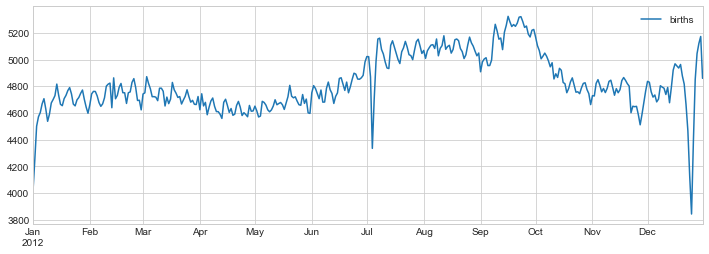

In [2]:
# 예제: 미국 출생률에 휴일이 미치는 영향
from datetime import datetime as dt
births = pd.read_csv("births.csv")

# quartiles
quartiles = np.percentile(births["births"], [25, 50, 75])
# mean, std
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)") # exclude outliers

births["day"] = births["day"].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format="%Y%m%d")

births_by_date = births.pivot_table("births",
                                    [births.index.month, births.index.day])

births_by_date.index = [dt(2012, month, day)
                        for (month, day) in births_by_date.index]

# 플로팅
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

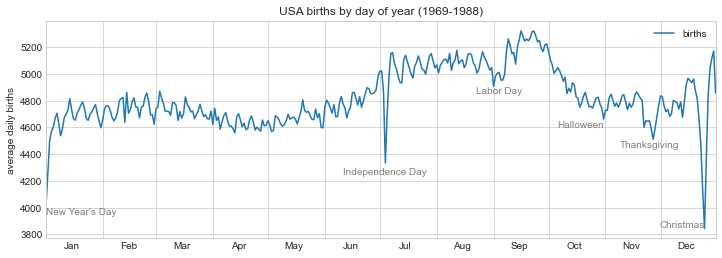

In [7]:
# 주석 추가 (plt.text, ax.text)
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

# 플롯에 레이블 추가
style = dict(size=10, color="gray") # **style as kwargs

ax.text("2012-1-1", 3950, "New Year's Day", **style)
ax.text("2012-7-4", 4250, "Independence Day", ha="center", **style)
ax.text("2012-9-4", 4850, "Labor Day", ha="center", **style)
ax.text("2012-10-31", 4600, "Halloween", ha="right", **style)
ax.text("2012-11-25", 4450, "Thanksgiving", ha="center", **style)
ax.text("2012-12-25", 3850, "Christmas", ha="right", **style)

# 축에 레이블 추가
ax.set(title="USA births by day of year (1969-1988)", ylabel="average daily births")

# 중앙 정렬한 월 레이블로 x축의 포맷 지정
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%h"));

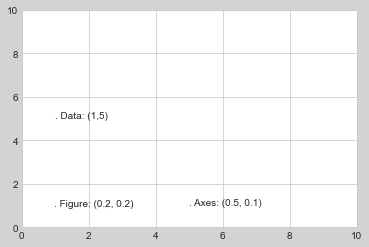

In [14]:
# 변환 및 텍스트 위치
# transform = ax.transData, ax.transAxes, fig.transFigure

fig, ax = plt.subplots(facecolor="lightgray")
ax.axis([0, 10, 0, 10])

# transform=ax.transData가 기본값이지만 그래도 직접 지정
ax.text(1, 5, ". Data: (1,5)", transform=ax.transData) # x, y 레이블과 관련된 일반적인 데이터 좌표
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes) # 위치를 축 크기의 분수로 제공
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure); # 위치를 그림 크기의 분수로 제공

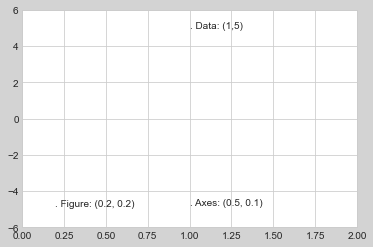

In [16]:
# 축 한계값 -> transData 좌표만 영향을 받으며, 나머지 좌표는 그대로 유지
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

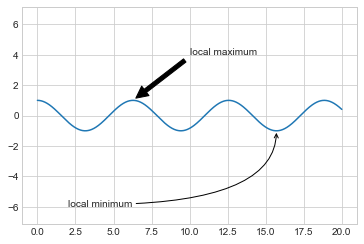

In [19]:
# 화살표와 주석
# plt.annotate()

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis("equal")

ax.annotate("local maximum", xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor="black", shrink=0.05))
ax.annotate("local minimum", xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3, angleA=0, angleB=-90"));